In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

### 1. Load the dataset into python environment

In [4]:
data =  pd.read_excel("C:/Users/USER/Downloads/Titanic.xlsx")

In [5]:
df = pd.DataFrame(data)

### 2. Make ‘PassengerId’ as the index column

In [6]:
df = df.set_index('PassengerId')


### 3. Check the basic details of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 891 entries, 1.0 to 891.0
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    float64
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(6), object(5)
memory usage: 83.5+ KB


In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S


In [10]:
print(df.dtypes)

Survived    float64
Pclass      float64
Name         object
Sex          object
Age         float64
SibSp       float64
Parch       float64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [11]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536.0,13.00,NaN,S
888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053.0,30.00,B42,S
889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369.0,30.00,C148,C
891.0,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376.0,7.75,NaN,Q


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [13]:
df[(df['Fare']==0) | (df['Age']==0) | (df['Pclass']==0)].index

Float64Index([180.0, 264.0, 272.0, 278.0, 303.0, 414.0, 467.0, 482.0, 598.0,
              634.0, 675.0, 733.0, 807.0, 816.0, 823.0],
             dtype='float64', name='PassengerId')

In [14]:
df = df.drop([180.0, 264.0, 278.0, 303.0, 414.0, 467.0, 482.0, 598.0,
              634.0, 675.0, 807.0, 816.0, 823.0])

In [15]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         170
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       677
Embarked      2
dtype: int64

In [16]:
df.isna().sum() / df.shape[0] * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.362187
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.107062
Embarked     0.227790
dtype: float64

In [17]:
Age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(Age_median)

In [18]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [19]:
Cabin_mode= df['Cabin'].mode()[0]
df['Cabin'] = df['Cabin'].fillna(Cabin_mode)

In [20]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [21]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [22]:
Embarked_mode= df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(Embarked_mode)

In [23]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [24]:
## Empty raws of all the columns are filled 

### 5. Check and handle outliers in at least 3 columns in the dataset

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

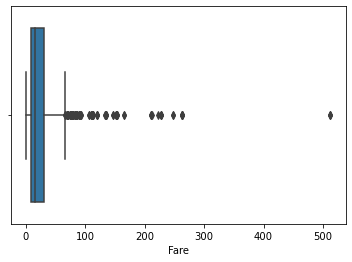

In [25]:

# detecting outliers by Box Plot
import seaborn as sns
sns.boxplot(df['Fare'])

In [26]:
#looks like fair>100 are outliers
# Position of the Outlier
print(np.where(df['Fare']>100))

(array([ 27,  31,  88, 118, 194, 214, 257, 266, 267, 294, 296, 301, 302,
       303, 307, 314, 315, 321, 328, 330, 333, 337, 369, 373, 376, 386,
       389, 430, 433, 491, 498, 520, 530, 537, 543, 550, 574, 601, 650,
       651, 669, 679, 688, 690, 698, 706, 720, 727, 732, 753, 769, 792,
       843], dtype=int64),)


In [27]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

### Checking for Fare column

In [28]:
# find limits for Fare

Fare_upper_limit, Fare_lower_limit = find_normal_boundaries(df, 'Fare', 3)
Fare_upper_limit, Fare_lower_limit

(182.3939898494954, -117.03191855109)

In [29]:
# Now let's replace the outliers by the maximum and minimum limit

df['Fare']= np.where(df['Fare'] > Fare_upper_limit, Fare_upper_limit,
                       np.where(df['Fare'] < Fare_lower_limit, Fare_lower_limit, df['Fare']))

### Checking for Age column

In [30]:
# find limits for Age

Age_upper_limit, Age_lower_limit = find_normal_boundaries(df, 'Age', 3)
Age_upper_limit, Age_lower_limit

(68.56022196772946, -9.917465703492564)

In [31]:
# Now let's replace the outliers by the maximum and minimum limit

df['Age']= np.where(df['Age'] > Age_upper_limit,Age_upper_limit,
                       np.where(df['Age'] < Age_lower_limit, Age_lower_limit, df['Age']))

### Checking for SiSp column

In [32]:
# find limits for SibSp

SibSp_upper_limit, SibSp_lower_limit = find_normal_boundaries(df, 'SibSp', 3)
SibSp_upper_limit, SibSp_lower_limit

(3.857850515310143, -2.7963470984536505)

In [33]:
 # Now let's replace the outliers by the maximum and minimum limit

df['SibSp']= np.where(df['SibSp'] > SibSp_upper_limit,SibSp_upper_limit,
                       np.where(df['SibSp'] < SibSp_lower_limit, SibSp_lower_limit, df['SibSp']))

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [34]:
from sklearn.model_selection import train_test_split

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [35]:
# let's separate the data into training and testing set
#X = df.drop('Survived', axis=1)
X = df[['Pclass','Age','SibSp','Parch','Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

X_train.shape, X_test.shape

((658, 5), (220, 5))

In [36]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([  3.        ,  68.56022197,   3.85785052,   5.        ,
       182.39398985])

In [38]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([-0.5       , -0.00986887,  0.        ,  0.        ,  0.        ])

In [39]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([  2.        ,  67.89022197,   3.85785052,   5.        ,
       182.39398985])

In [40]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

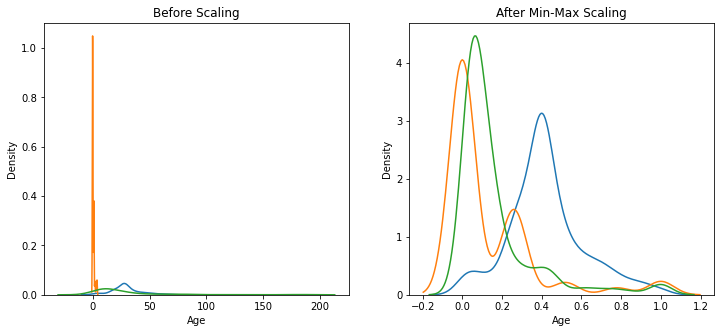

In [41]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['SibSp'], ax=ax1)
sns.kdeplot(X_train['Fare'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['SibSp'], ax=ax2)
sns.kdeplot(X_train_scaled['Fare'], ax=ax2)

plt.show()

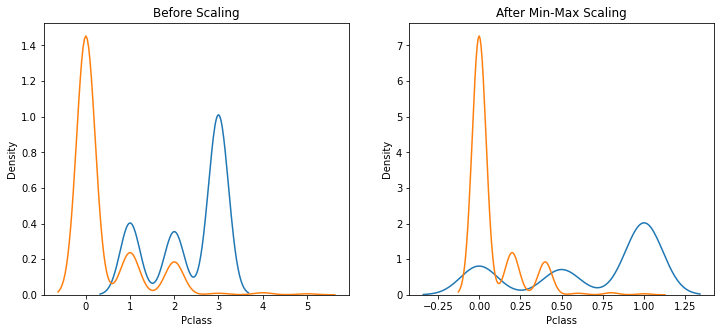

In [42]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Pclass'], ax=ax1)
sns.kdeplot(X_train['Parch'], ax=ax1)


# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['Pclass'], ax=ax2)
sns.kdeplot(X_train_scaled['Parch'], ax=ax2)
plt.show()